In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

### Define error term 

In [3]:

# from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  

### Run it for two numpy arrays (of the same size)

In [4]:
a = np.random.rand(5)
b = np.random.rand(5)

mean_absolute_percentage_error(a,b)

200.7208298389024

## ARIMA model function that forecasts variable values for a given ARIMA order

In [5]:

 # evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
   # prepare training dataset
   train_size = int(len(X) - 7)
   train, test = X[0:train_size], X[train_size:]
   history = [x for x in train]
   # make predictions
   predictions = list()
   for t in range(len(test)):
      model = ARIMA(history, order=arima_order)
      model_fit = model.fit(disp=0)
      yhat = model_fit.forecast()[0]
      predictions.append(yhat)
      obs = test[t]
      history.append(test[t])
      print('predicted=%f, expected=%f' % (yhat, obs))
   # calculate out of sample error
   #test = np.array(test)
   #predictions = np.array(predictions)
   error = mean_absolute_percentage_error(test, predictions)
   #error = error.item()
   return error

In [6]:
c = np.random.rand(100)
evaluate_arima_model(c, (1,0,0))

predicted=0.504499, expected=0.585275
predicted=0.505868, expected=0.562580
predicted=0.506516, expected=0.687054
predicted=0.508570, expected=0.560783
predicted=0.509057, expected=0.661181
predicted=0.510957, expected=0.522388
predicted=0.510657, expected=0.266965


24.939492710664453

### Function to run above model for all values of p,d,q and return the best suited order according to least MAPE

In [7]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models_test(X):
	p_values = [0, 5]
	d_values = range(0, 2)
	q_values = range(0, 5)
	dataset = X.astype('float32')
	best_score, best_cfg = float("inf"), 0
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mape = evaluate_arima_model(dataset, order)
					if mape < best_score:
						best_score, best_cfg = mape, order
					print('ARIMA%s MAPE=%.3f' % (order,mape))
				except:
					continue
	return best_cfg

In [8]:
d = np.random.rand(100)
evaluate_models_test(d)

predicted=0.493272, expected=0.747969
predicted=0.495981, expected=0.116326
predicted=0.491985, expected=0.228638
predicted=0.489242, expected=0.594103
predicted=0.490323, expected=0.175535
predicted=0.487111, expected=0.510522
predicted=0.487347, expected=0.645939
ARIMA(0, 0, 0) MAPE=99.396
predicted=0.437330, expected=0.747969
predicted=0.471343, expected=0.116326

c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=0.526290, expected=0.228638
predicted=0.514265, expected=0.594103
predicted=0.483025, expected=0.175535
predicted=0.515086, expected=0.510522
predicted=0.487513, expected=0.645939
ARIMA(0, 0, 1) MAPE=99.579
predicted=0.426429, expected=0.747969
predicted=0.466522, expected=0.116326
predicted=0.513254, expected=0.228638
predicted=0.529618, expected=0.594103
predicted=0.498238, expected=0.175535
predicted=0.513915, expected=0.510522
predicted=0.499752, expected=0.645939
ARIMA(0, 0, 2) MAPE=99.907
predicted=0.418764, expected=0.747969
predicted=0.435697, expected=0.116326
predicted=0.458305, expected=0.228638
predicted=0.486058, expected=0.594103
predicted=0.524593, expected=0.175535
predicted=0.536054, expected=0.510522
predicted=0.499343, expected=0.645939
ARIMA(0, 0, 3) MAPE=97.819
predicted=0.414993, expected=0.747969
predicted=0.439346, expected=0.116326
predicted=0.457868, expected=0.228638
predicted=0.477206, expected=0.594103
predicted=0.519577, expected=0.175535
predic

c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.430088, expected=0.228638


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.433978, expected=0.594103


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.433096, expected=0.175535


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.477557, expected=0.510522


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.462971, expected=0.645939
ARIMA(5, 0, 2) MAPE=90.552


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.477622, expected=0.747969


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.513250, expected=0.116326


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.574542, expected=0.228638


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.549477, expected=0.594103
predicted=0.492206, expected=0.175535


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.520353, expected=0.510522


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.497819, expected=0.645939
ARIMA(5, 0, 3) MAPE=105.028


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.464552, expected=0.747969


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.488772, expected=0.116326


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.542138, expected=0.228638


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.566185, expected=0.594103


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.510720, expected=0.175535


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.564629, expected=0.510522


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.537914, expected=0.645939
ARIMA(5, 0, 4) MAPE=106.685
predicted=0.579189, expected=0.747969
predicted=0.714416, expected=0.116326
predicted=0.687962, expected=0.228638
predicted=0.631437, expected=0.594103
predicted=0.586203, expected=0.175535
predicted=0.403975, expected=0.510522
predicted=0.351123, expected=0.645939
ARIMA(5, 1, 0) MAPE=119.852
predicted=0.409518, expected=0.747969
predicted=0.536542, expected=0.116326
predicted=0.526825, expected=0.228638
predicted=0.506326, expected=0.594103
predicted=0.519789, expected=0.175535
predicted=0.523294, expected=0.510522
predicted=0.536843, expected=0.645939
ARIMA(5, 1, 1) MAPE=103.190


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.437028, expected=0.747969


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.556432, expected=0.116326


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.580341, expected=0.228638


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.536197, expected=0.594103


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.505603, expected=0.175535


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.523232, expected=0.510522
predicted=0.502618, expected=0.645939
ARIMA(5, 1, 2) MAPE=105.737


c:\users\surabhi\env3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(5, 0, 1)

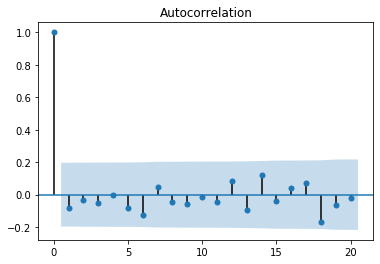

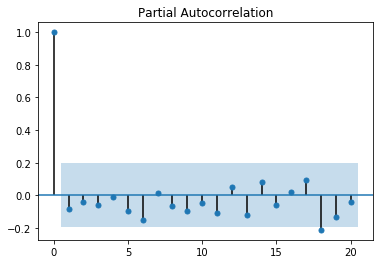

In [9]:
plot_acf(d, ax=pyplot.gca())
pyplot.show()
plot_pacf(d, ax=pyplot.gca())
pyplot.show()